In [121]:
import numpy as np
from IPython.display import clear_output
import os
import matplotlib.pyplot as plt

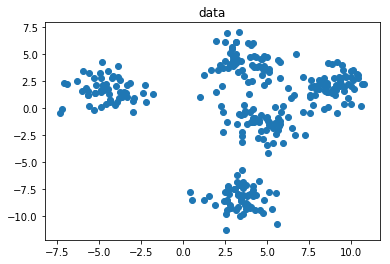

In [122]:
X = np.load("X.npy")

plt.figure()
plt.scatter(X[0,:],X[1,:])
plt.title("data")

plt.savefig("data.png")

In [123]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def kmeans(X, K=8, max_iterations=100):
    if not os.path.exists("kmeans-k{}".format(K)):
        os.mkdir("kmeans-k{}".format(K))
    plt.figure()
    
    # 
    # step 1 init cluster centers
    x_idxs = np.random.permutation(X.shape[1])
    u = X[:, x_idxs[:K]]
    
    # init all samples x into first cluster
    y = np.zeros((X.shape[1],))

    for iter_idx in range(max_iterations):
        
        # D_ik denotes the distance between x_i and u_k
        D = np.zeros((X.shape[1], K))
        
        for i in range(X.shape[1]):
            
            ####### start Your code here ########
            # step 2
            for k in range(K):
                # rewrite the following line to calculate the distance between x_i and u_k
                # then store d_ik into D
                D[i,k]=distance(X[:,i],u[:,k])
                pass
            
            # rewrite the following line to classify the 𝑥_𝑖 to its nearest cluster 𝐶_𝑘 
            # y^{i} = min_{k}{d_{ik} | k = 1,2,...K}
            # remeber that the i-th line of matrix D is the distances of x^{1}
            y = np.argmin(D,axis=1)
            
            ####### end Your code  ############
        # step 3
        for k in range(K):
            p = 0
            v = 0
            for i in range(0,len(y)):
            ####### start Your code here ########
                if y[i] == k:
                    p += X[:,i]
                    v += 1
                else:
                    p += 0
            # Calculate the mean of the samples 𝑥 \in 𝑐_𝑘 as new 𝜇_𝑘 
            # remeber that the cluster information of x are stored in y 
            u[:,k] = p/v 
            ####### end Your code  ############
        
        ## plot figures
        clear_output(wait=True)
        plt.scatter(X[0,:],X[1,:], c=y, s=8)
        plt.title("kmeans clustering at iter={}".format(iter_idx))
        
        #plot cluster centers
        plt.scatter(u[0,:],u[1,:], c=range(K), s=K, marker='o', linewidths=6)
        for k in range(K):
            plt.text(u[0,k], u[1,k], "u_{}".format(k),)
        
        plt.savefig("kmeans-k{}/iter={}.png".format(K, iter_idx))
        plt.show()
        
    return y

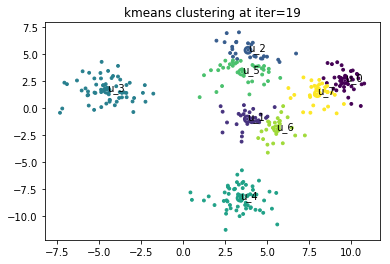

In [124]:
y = kmeans(X, K=8, max_iterations=20)